In [84]:
#Data Storytelling for Springboard 7.2 checkpoint for Vicki M. 
#The dataset here is from the UC Irvine Machine Learning Repository Heart Disease Data, 
#featuring the processed Cleveland dataset. This dataset is found here:
#http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/cleveland.data.

#The Cleveland dataset is the most complete of all the datasets from the repository from 
#which it comes; separately elsewhere I am examining these patterns for the combined data sets
#with medians or modes for missing data. Here, though, I am generating plots and values with 
#only the Cleveland data for a visual comparison against my project file, for my own purposes.
#What I questioned with the data available here is whether any of the variables present 
#obviously relate to presence and/or level of heart disease in a fashion that could be 
#examined using the exploratory data analysis tools we have learned so far in the course. 
#I also wondered how the values for each variable were distributed within the population. A 
#straightforward hypothesis is that markers of poorer cardiac health, as well as increased age,
#may be related to level of heart disease. A separate hypothesis is that age itself is
#correlated with markers of poorer cardiac health. Another hypothesis is that sex is an 
#important factor in heart disease risk, with men showing greater proneness. It will be 
#important to keep in mind, though, that women may show different predictive features than 
#men do. Not all possible comparisons appear here because most data are categorical and not 
#amenable to the types of analyses incorporated into this exploratory analysis. However, 
#continuous variables are compared, basic statistics for each variable are achievable, and 
#some preliminary interpretations are possible.

#Investigations included here begin with looking at the head rows of the data file and its 
#column and other info, followed by histograms of each variable to get an idea of how data are
#distributed. Following this, scatter plots of age with cholesterol levels and age with 
#maximum heart rate are presented to evaluate how age trends with these continuous variables 
#that are straightforward to interpret compared to other vital statistics. Combined boxplots
#follow to get another view of data distributions. Basic statistics showing counts, means, 
#standard deviations, quartile values, and medians are then shown; these I am separately 
#comparing with my combined other dataset that includes data that are not as complete as the 
#Cleveland dataset is. Following these I show scatter plots with linear regressions and broken
#down by sex to evaluate trends in the data and how they vary by sex. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cleveland_df = pd.read_csv('.../processed_cleveland_data.csv', header=None, na_values = '?')
cleveland_df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
print(cleveland_df.head())
print(cleveland_df.columns)
cleveland_df.info()

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cp          303 non-null float64
trestbps    303

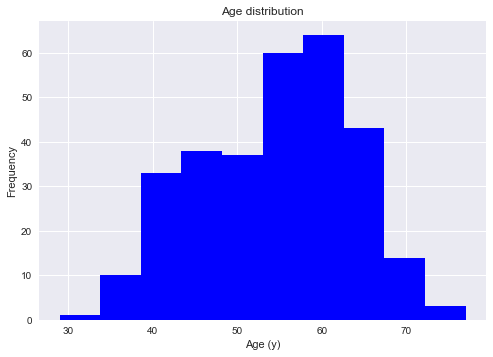

In [88]:
#Looking at age distribution among patients, with histograms of other variables to follow.
cleveland_df['age'].plot(kind='hist', color='blue')
plt.xlabel('Age (y)')
plt.title('Age distribution')
plt.show()

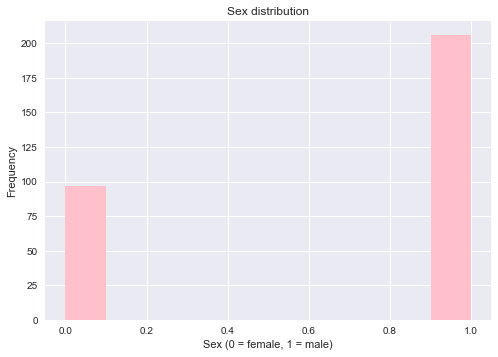

In [89]:
#Age, above, is more or less normally distributed.

cleveland_df['sex'].plot(kind='hist', color='pink')
plt.xlabel('Sex (0 = female, 1 = male)')
plt.title('Sex distribution')
plt.show()

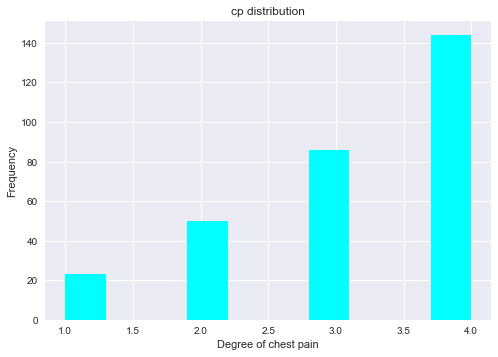

In [90]:
#Sex, above, shows greater frequency of men than women in this dataset.

cleveland_df['cp'].plot(kind='hist', color='aqua')
plt.xlabel('Degree of chest pain')
plt.title('cp distribution')
plt.show()

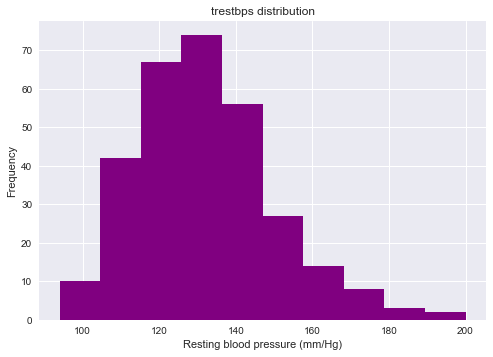

In [91]:
#'cp', or angina, above, shows higher frequency of higher severity.

cleveland_df['trestbps'].plot(kind='hist', color='purple')
plt.xlabel('Resting blood pressure (mm/Hg)')
plt.title('trestbps distribution')
plt.show()

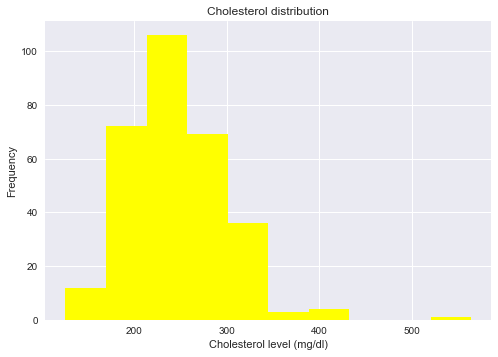

In [92]:
#Resting blood pressure, above, is sort of normally distributed, but slightly skewed.

cleveland_df['chol'].plot(kind='hist', color='yellow')
plt.xlabel('Cholesterol level (mg/dl)')
plt.title('Cholesterol distribution')
plt.show()

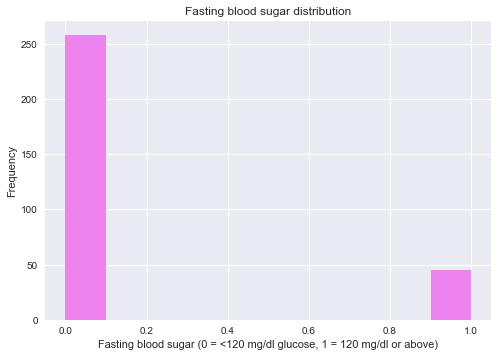

In [94]:
# Cholesterol, above, is more or less normally distributed with some outliers.

cleveland_df['fbs'].plot(kind='hist', color='violet')
plt.xlabel('Fasting blood sugar (0 = <120 mg/dl glucose, 1 = 120 mg/dl or above)')
plt.title('Fasting blood sugar distribution')
plt.show()

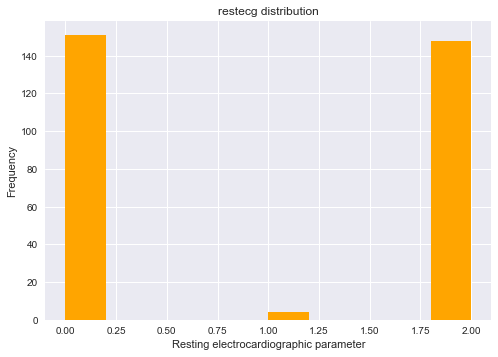

In [95]:
#Fasting blood sugar, above, shows most of the patients to have levels below 120 mg/dl.

cleveland_df['restecg'].plot(kind='hist', color='orange')
plt.xlabel('Resting electrocardiographic parameter')
plt.title('restecg distribution')
plt.show()

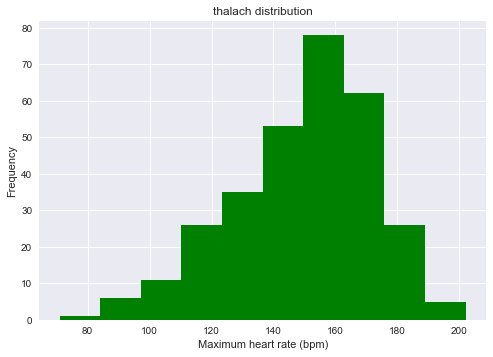

In [96]:
#Resting electrocargiogram levels, above, show most people to have either normal results or left 
#ventricular hypertrophy, with few in between.

cleveland_df['thalach'].plot(kind='hist', color='green')
plt.xlabel('Maximum heart rate (bpm)')
plt.title('thalach distribution')
plt.show()

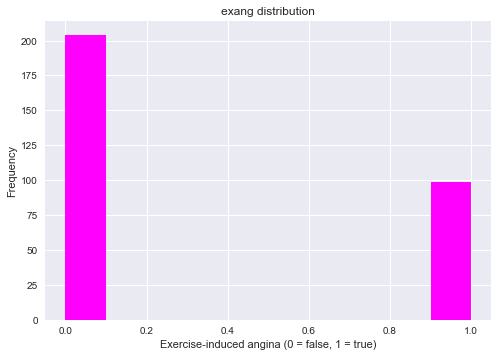

In [97]:
#Maximum heart rate, above, was somewhat normally distributed but skewed.

cleveland_df['exang'].plot(kind='hist', color='magenta')
plt.xlabel('Exercise-induced angina (0 = false, 1 = true)')
plt.title('exang distribution')
plt.show()

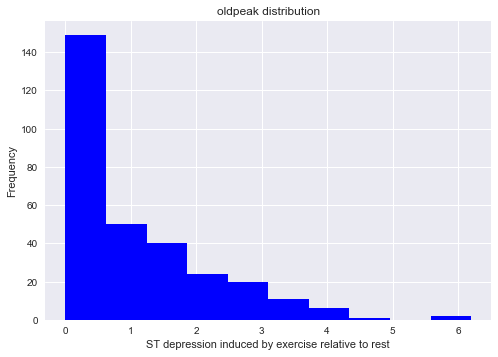

In [98]:
#Exercise-induced angina, above, was negative for most.

cleveland_df['oldpeak'].plot(kind='hist', color='blue')
plt.xlabel('ST depression induced by exercise relative to rest')
plt.title('oldpeak distribution')
plt.show()

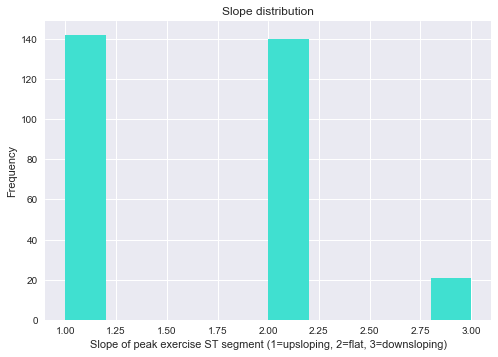

In [99]:
#'ST depression induced by exercise relative to rest', above, was skewed and zero 
#for most.

cleveland_df['slope'].plot(kind='hist', color='turquoise')
plt.xlabel('Slope of peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)')
plt.title('Slope distribution')
plt.show()

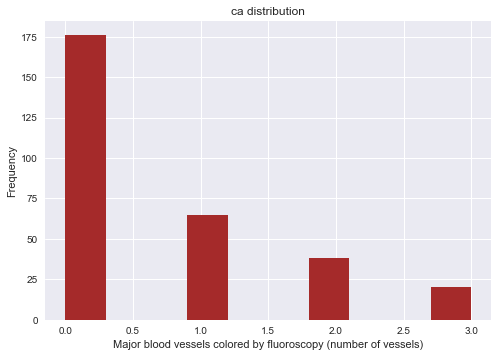

In [100]:
#Peak exercise ST segment, above, was upsloping or flat for most, and downsloping for least.

cleveland_df['ca'].plot(kind='hist', color='brown')
plt.xlabel('Major blood vessels colored by fluoroscopy (number of vessels)')
plt.title('ca distribution')
plt.show()

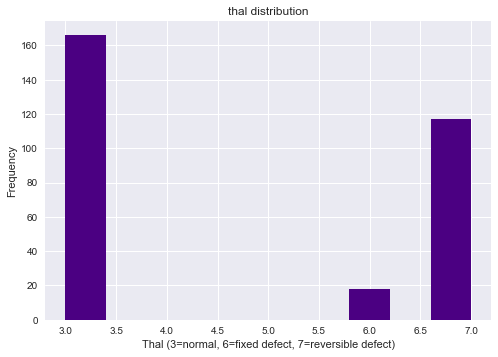

In [101]:
#Vessels colored in fluoroscopy, above, was zero for most, with a decreasing trend as 
#number of affected vessels increased. 

cleveland_df['thal'].plot(kind='hist', color='indigo')
plt.xlabel('Thal (3=normal, 6=fixed defect, 7=reversible defect)')
plt.title('thal distribution')
plt.show()

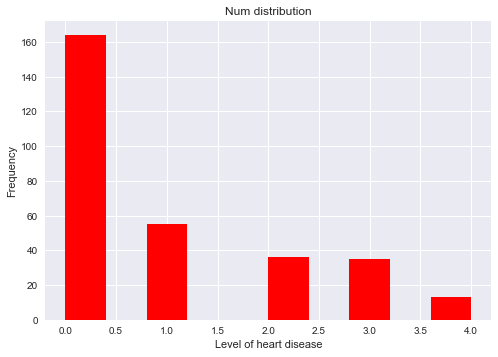

In [102]:
#'Thal', above, was normal for most, followed by reversible defect, and fixed defect for 
#the least.

cleveland_df['num'].plot(kind='hist', color='red')
plt.xlabel('Level of heart disease')
plt.title('Num distribution')
plt.show()

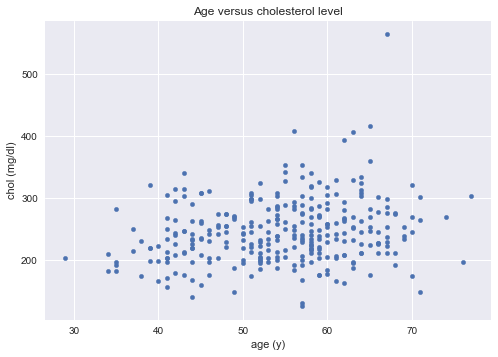

In [77]:
#'Num', the target variable indicating level of heart disease severity, is zero for most with
#presence in several patients, too, at varying levels of severity. The least have the most 
#severe presentation of it.

cleveland_df.plot(x='age', y='chol', kind='scatter')
plt.xlabel('age (y)')
plt.title('Age versus cholesterol level')
plt.ylabel('chol (mg/dl)')
plt.show()

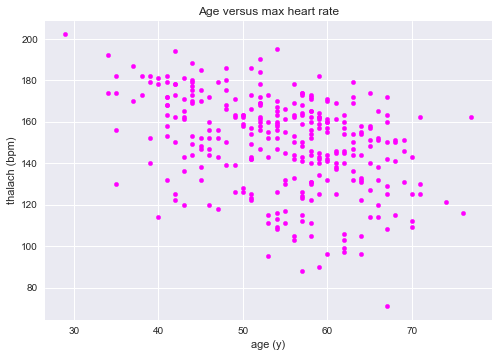

In [78]:
#Age and cholesterol level show a lot of scatter, but perhaps there is a trend that is
#hard to distinguish here.

cleveland_df.plot(x='age', y='thalach', kind='scatter', color='magenta')
plt.title('Age versus max heart rate')
plt.xlabel('age (y)')
plt.ylabel('thalach (bpm)')
plt.show()

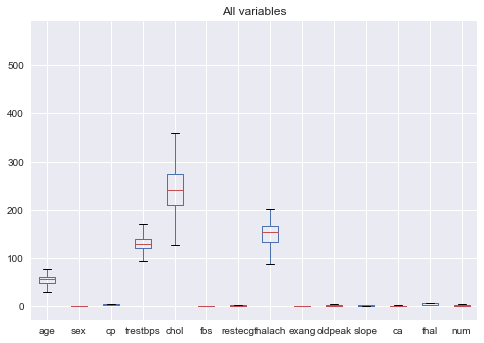

In [79]:
#Age versus maximum heart rate shows a lot of scatter, but it does appear there may be a trend,
#though this would require more sophisticated analysis.

#Many scatter plots of continuous variables resemble these above, where there are slight signals,
#but mostly the data are quite spread out.
#Next up are box plots, starting with all variables in one plot.
cleveland_df.plot(kind='box')
plt.title('All variables')
plt.show()

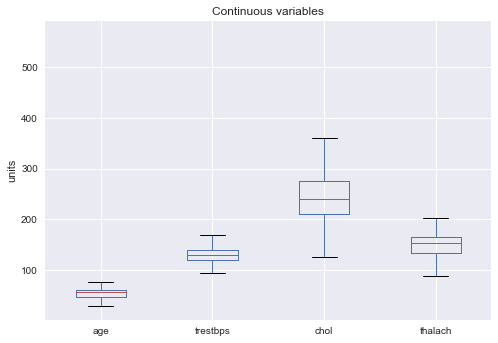

In [80]:
#Continuous and categorical data do not mix well in this graph, so plotting separately now.
cleveland_df.plot(y=['age', 'trestbps', 'chol', 'thalach'], kind='box')
plt.title('Continuous variables')
plt.ylabel('units')
plt.show()

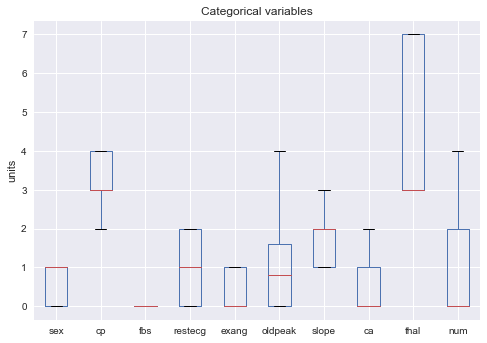

In [81]:
cleveland_df.plot(y=['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'], kind='box')
plt.title('Categorical variables')
plt.ylabel('units')
plt.show()

In [82]:
#With categorical values often the most common value is one that is a sign of better health, 
#so several of those show means at a minimum value with a one-tailed distribution.

#Next up is to view basic statistics, including quartile values.
cleveland_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [26]:
#Median does not get called out with "describe", so that will have to be outputted separately.
cleveland_df.median()

age          56.0
sex           1.0
cp            3.0
trestbps    130.0
chol        241.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         2.0
ca            0.0
thal          3.0
num           0.0
dtype: float64

In [39]:
#Interestingly, the mean and median values are not too divergent between Cleveland alone
#without adjustment of missing values versus the combined dataset (not shown) I have for which 
#I have adjusted missing values using median or mode. Some continuous variables, like 
#cholesterol and 'thalach', have more divergent medians and means between Cleveland and my 
#other combined dataset, but by and large there is agreement. The mean for 'ca' differs between 
#the two for mean, but it is below 1 for each. The Cleveland dataset is the only one for which 
#there are many 'ca' values to contribute.

#For many of the scatterplots there is not much to discern. There are many categorical
#variables in this dataset, and continuous variables paired against each other do not
#reveal patterns individually that well with this dataset. Perhaps some can emerge 
#when looking at linear regressions among some of these, and also while taking advantage of 
#the ability to track patterns with data subdivided into two categories in Seaborn 
#(in this case separating by sex).

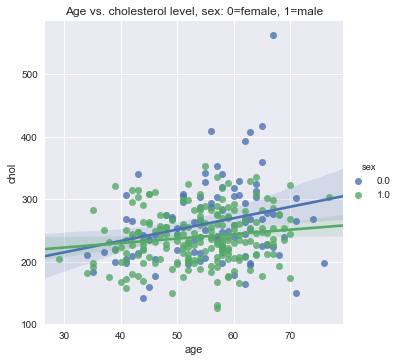

In [32]:
#First we look at age versus cholesterol levels, by sex.

sns.lmplot(x='age', y='chol', data=cleveland_df, hue='sex')
plt.title('Age vs. cholesterol level, sex: 0=female, 1=male')
plt.show()

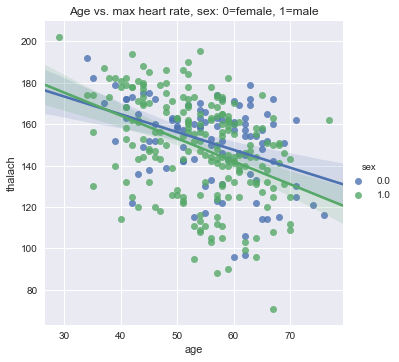

In [33]:
#From the above it is difficult to discern if there is a relevant trend for age and cholesterol
#level, as well as a difference between sexes for this, though the slopes differ for each sex.
#It would appear that cholesterol shows more of an increase with age for women.

sns.lmplot(x='age', y='thalach', data=cleveland_df, hue='sex')
plt.title('Age vs. max heart rate, sex: 0=female, 1=male')
plt.show()

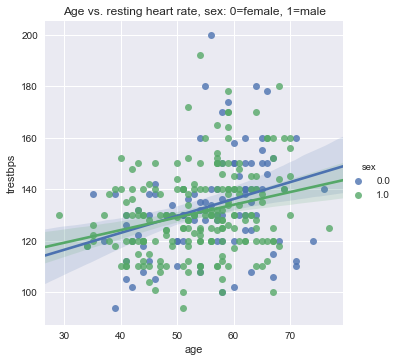

In [34]:
#From the above, for both sexes there appears to be a downward trend in maximum heart rate with
#age, with the effect similar between sexes but potentially more pronounced for men.

sns.lmplot(x='age', y='trestbps', data=cleveland_df, hue='sex')
plt.title('Age vs. resting heart rate, sex: 0=female, 1=male')
plt.show()

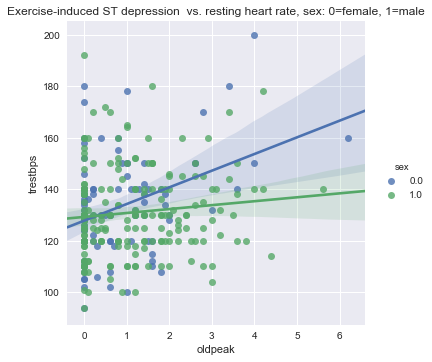

In [35]:
#In contrast, the above appears to show an increase in resting heart rate with age, and there
#is a lot of overlap between sexes here.

sns.lmplot(x='oldpeak', y='trestbps', data=cleveland_df, hue='sex')
plt.title('Exercise-induced ST depression  vs. resting heart rate, sex: 0=female, 1=male')
plt.show()

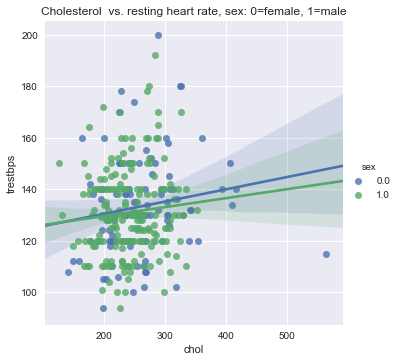

In [36]:
#The above chart shows an increasing spread in data as 'oldpeak' and 'trestbps' values rise, 
#but the data suggest that for women there is a stronger positive relationship between these
#two values than for men.

sns.lmplot(x='chol', y='trestbps', data=cleveland_df, hue='sex')
plt.title('Cholesterol  vs. resting heart rate, sex: 0=female, 1=male')
plt.show()

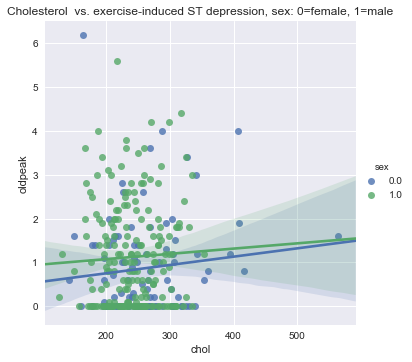

In [37]:
#The above chart shows a very high degree of spread in the data, but for both sexes there is 
#potentially a slight positive relationship between the two variables.

sns.lmplot(x='chol', y='oldpeak', data=cleveland_df, hue='sex')
plt.title('Cholesterol  vs. exercise-induced ST depression, sex: 0=female, 1=male')
plt.show()

In [87]:
#The above chart shows a substantial amount of noise in the data, with perhaps a positive 
#trend, though it is questionable, including the slightly different slopes between the sexes. 
#Overall, most of the data available in this dataset do not show obvious, striking patterns 
#between variables paired against each other one-on-one. Also, many variables are categorical, 
#which are harder to plot and find patterns with using the simpler exporatory statistics I have
#used here. Linear regressions are not appropriate for most categorical data, so there are 
#several other possible evaluations that are not examined here. Among these continuous 
#variables, though, there may be some patterns to look out for, as described above, but overall 
#it is my expectation that the predictive power of these variables will come from examining 
#them collectively, in a multivariate manner, and in a way that enables meaningful 
#consideration of the discrete variables used here. Categorical data are not the best, 
#particularly when the variables in question frequently come from patient measurements that are
#continuous in nature, but the categories used may provide care providers with convenient ways 
#of looking at patient health, and this is what is available for us to model. One variable, for
#instance, that should impact level of heart disease risk is the 'ca' value, though here it is 
#presented as a categorical variable with few category options, and it is only captured in the 
#Cleveland dataset, which may impact the predictive power of the model. Heart disease level 
#itself is presented as a categorical variable. I suspect more sophisticated analyses of 
#variables such as cholesterol and sex will show stronger correlations with level of heart 
#disease than what is viewable in the simpler exploratory analyses shown here. 

#It is hard to make much of these data at this point, but even though there is much noise in 
#the data viewed here, the trendlines show potential for some relationships to hold value as 
#far as predictive utility.

